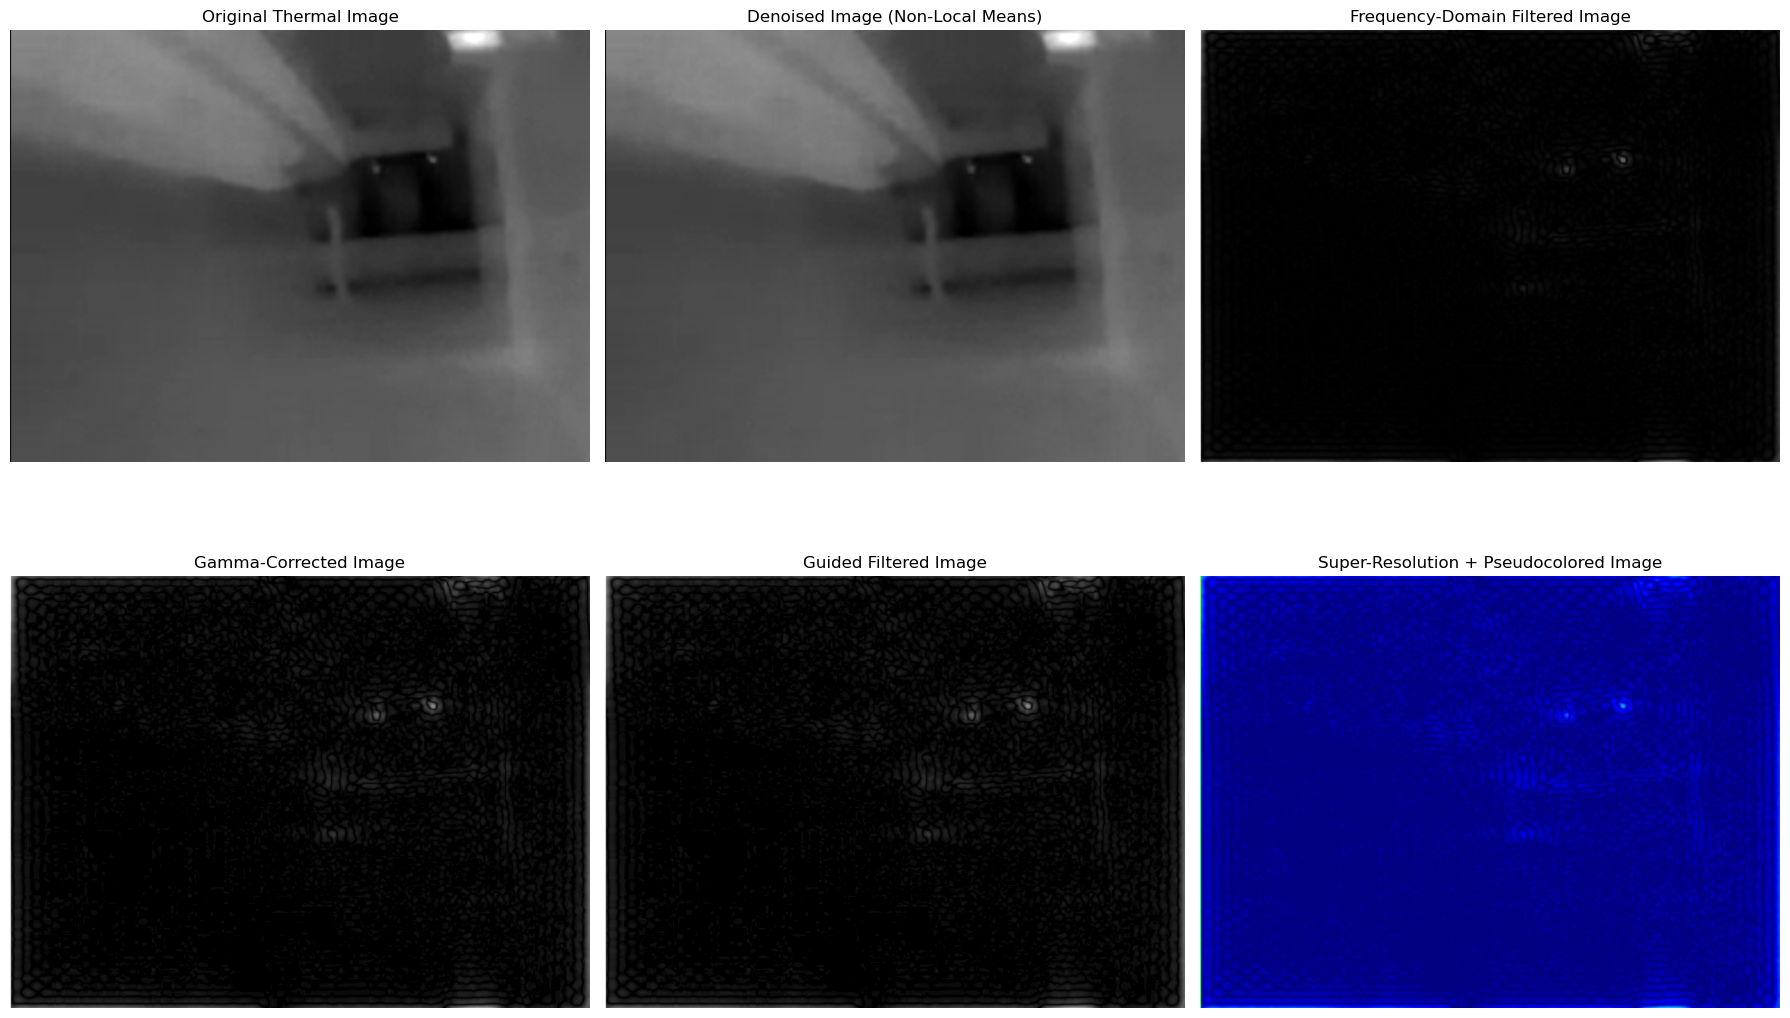

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_float

# Load the grayscale thermal image
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# Step 1: Noise Reduction (Non-Local Means Denoising)
image_float = img_as_float(image)  # Convert to float for denoising
sigma_est = np.mean(estimate_sigma(image_float, channel_axis=None))  # Use channel_axis instead of multichannel
denoised_image = denoise_nl_means(image_float, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=3)

# Step 2: Frequency-Domain Processing (Fourier Transform)
f = np.fft.fft2(denoised_image)
f_shift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(f_shift))

# Create a high-pass filter mask
rows, cols = denoised_image.shape
crow, ccol = rows // 2, cols // 2
mask = np.ones((rows, cols), np.uint8)
r = 30  # Radius of the mask
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r * r
mask[mask_area] = 0

# Apply the mask and inverse Fourier Transform
f_shift_filtered = f_shift * mask
f_filtered = np.fft.ifftshift(f_shift_filtered)
image_filtered = np.fft.ifft2(f_filtered)
image_filtered = np.abs(image_filtered)

# Step 3: Adaptive Contrast Enhancement (Adaptive Gamma Correction)
def adaptive_gamma_correction(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

gamma_corrected_image = adaptive_gamma_correction((image_filtered * 255).astype(np.uint8), gamma=1.5)

# Step 4: Edge-Preserving Smoothing (Guided Filter)
guided_filtered_image = cv2.ximgproc.guidedFilter(guide=gamma_corrected_image, src=gamma_corrected_image, radius=10, eps=0.01)

# Step 5: Deep Learning-Based Super-Resolution (Using OpenCV's DNN Module)
# Load a pre-trained super-resolution model (e.g., ESRGAN)
# Download the model from: https://github.com/opencv/opencv_zoo/tree/main/models/super_resolution
model_path = "models/ESPCN_x4.pb"  # Replace with the path to your model
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel(model_path)
sr.setModel("espcn", 4)  # 4x upscaling
super_res_image = sr.upsample(guided_filtered_image)

# Step 6: Pseudocoloring (Apply a colormap for better visualization)
pseudocolored_image = cv2.applyColorMap(super_res_image, cv2.COLORMAP_JET)

# Convert BGR (OpenCV default) to RGB for Matplotlib
pseudocolored_image_rgb = cv2.cvtColor(pseudocolored_image, cv2.COLOR_BGR2RGB)

# Display the results using Matplotlib
plt.figure(figsize=(18, 12))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Thermal Image')
plt.axis('off')

# Denoised Image
plt.subplot(2, 3, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image (Non-Local Means)')
plt.axis('off')

# Frequency-Domain Filtered Image
plt.subplot(2, 3, 3)
plt.imshow(image_filtered, cmap='gray')
plt.title('Frequency-Domain Filtered Image')
plt.axis('off')

# Gamma-Corrected Image
plt.subplot(2, 3, 4)
plt.imshow(gamma_corrected_image, cmap='gray')
plt.title('Gamma-Corrected Image')
plt.axis('off')

# Guided Filtered Image
plt.subplot(2, 3, 5)
plt.imshow(guided_filtered_image, cmap='gray')
plt.title('Guided Filtered Image')
plt.axis('off')

# Super-Resolution and Pseudocolored Image
plt.subplot(2, 3, 6)
plt.imshow(pseudocolored_image_rgb)
plt.title('Super-Resolution + Pseudocolored Image')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

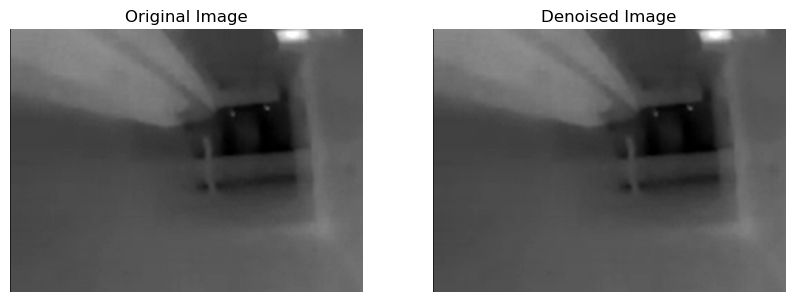

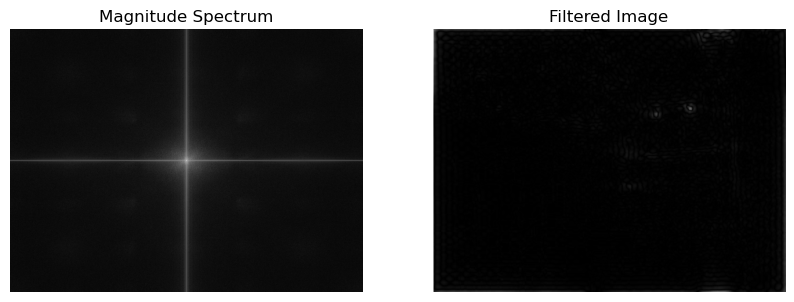

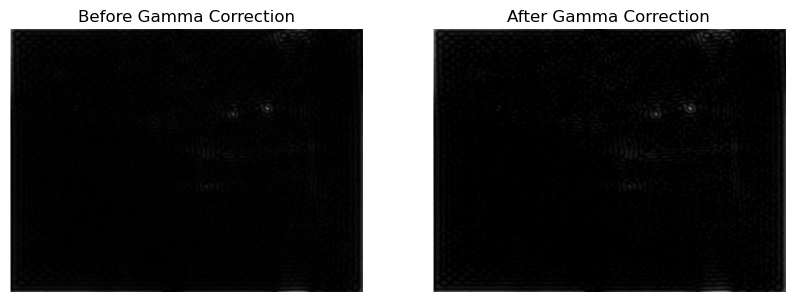

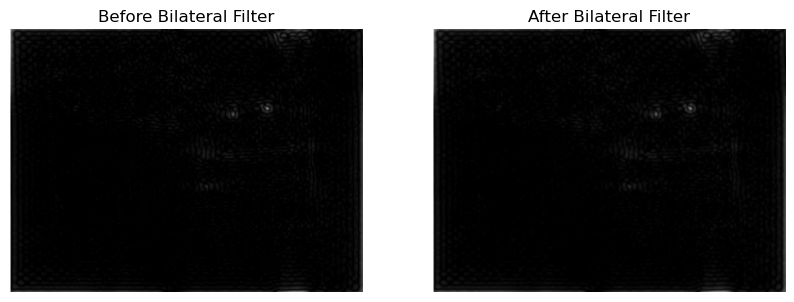

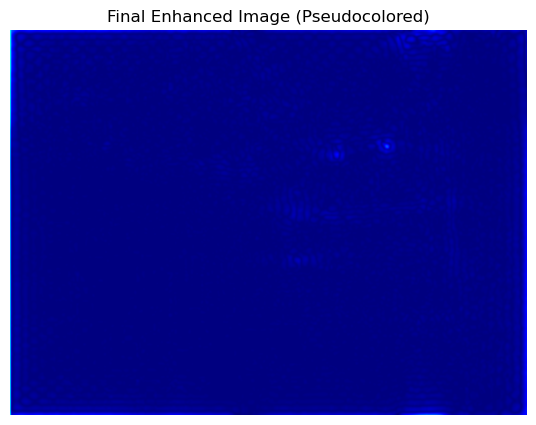

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_float

# Load the grayscale thermal image
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# Step 1: Noise Reduction (Non-Local Means Denoising)
image_float = img_as_float(image)  # Convert to float for denoising
sigma_est = np.mean(estimate_sigma(image_float, channel_axis=None))  # Estimate noise level
denoised_image = denoise_nl_means(image_float, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=3)

# Display intermediate result: Denoised Image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')
plt.show()

# Step 2: Frequency-Domain Processing (Fourier Transform)
f = np.fft.fft2(denoised_image)
f_shift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)  # Log transform for better visualization

# Create a high-pass filter mask
rows, cols = denoised_image.shape
crow, ccol = rows // 2, cols // 2
mask = np.ones((rows, cols), np.uint8)
r = 30  # Radius of the mask
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r * r
mask[mask_area] = 0

# Apply the mask and inverse Fourier Transform
f_shift_filtered = f_shift * mask
f_filtered = np.fft.ifftshift(f_shift_filtered)
image_filtered = np.fft.ifft2(f_filtered)
image_filtered = np.abs(image_filtered)

# Display intermediate result: Frequency-Domain Filtered Image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_filtered, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')
plt.show()

# Step 3: Adaptive Contrast Enhancement (Adaptive Gamma Correction)
def adaptive_gamma_correction(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

gamma_corrected_image = adaptive_gamma_correction((image_filtered * 255).astype(np.uint8), gamma=1.2)

# Display intermediate result: Gamma-Corrected Image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_filtered, cmap='gray')
plt.title('Before Gamma Correction')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected_image, cmap='gray')
plt.title('After Gamma Correction')
plt.axis('off')
plt.show()

# Step 4: Edge-Preserving Smoothing (Bilateral Filter)
bilateral_filtered_image = cv2.bilateralFilter(gamma_corrected_image, d=9, sigmaColor=75, sigmaSpace=75)

# Display intermediate result: Bilateral Filtered Image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gamma_corrected_image, cmap='gray')
plt.title('Before Bilateral Filter')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bilateral_filtered_image, cmap='gray')
plt.title('After Bilateral Filter')
plt.axis('off')
plt.show()

# Step 5: Pseudocoloring (Apply a colormap for better visualization)
pseudocolored_image = cv2.applyColorMap(bilateral_filtered_image, cv2.COLORMAP_JET)

# Convert BGR (OpenCV default) to RGB for Matplotlib
pseudocolored_image_rgb = cv2.cvtColor(pseudocolored_image, cv2.COLOR_BGR2RGB)

# Display final result
plt.figure(figsize=(10, 5))
plt.imshow(pseudocolored_image_rgb)
plt.title('Final Enhanced Image (Pseudocolored)')
plt.axis('off')
plt.show()

/tmp/ipykernel_17605/773823647.py:44: RuntimeWarning: invalid value encountered in divide
  image = np.power(image / float(np.max(image)), gamma)
/tmp/ipykernel_17605/773823647.py:46: RuntimeWarning: invalid value encountered in cast
  return np.uint8(image)


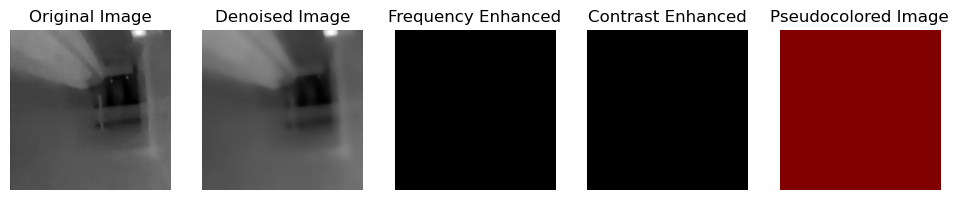

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import restoration
from skimage import img_as_float

# 1. Noise Reduction (Non-Local Means Denoising)
def denoise_image(image):
    denoised_image = restoration.denoise_nl_means(image, h=0.1, patch_size=5, patch_distance=6)
    return denoised_image

# 2. Frequency-Domain Processing (Fourier Transform)
def enhance_frequencies(image):
    # Convert the image to float
    img_float = img_as_float(image)

    # Perform FFT
    f_transform = np.fft.fft2(img_float)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Create a high-pass filter
    rows, cols = img_float.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.float32)
    r = 30  # Mask radius, adjust based on how much low frequency you want to remove
    center = [crow, ccol]
    x, y = np.fft.fftfreq(cols), np.fft.fftfreq(rows)
    x, y = np.meshgrid(x, y)
    mask = np.fft.fftshift(np.sqrt(x**2 + y**2) > r)

    # Apply mask (high-pass filter)
    f_transform_shifted *= mask

    # Inverse FFT to get back to spatial domain
    f_transform_ishifted = np.fft.ifftshift(f_transform_shifted)
    img_filtered = np.abs(np.fft.ifft2(f_transform_ishifted))

    return img_filtered

# 3. Adaptive Contrast Enhancement (Gamma Correction)
def enhance_contrast(image, gamma=1.2):
    # Apply gamma correction (gamma > 1 darkens the image, gamma < 1 brightens)
    image = np.array(image, dtype=np.float32)
    image = np.power(image / float(np.max(image)), gamma)
    image *= 255
    return np.uint8(image)

# 4. Edge-Preserving Smoothing (Bilateral Filter)
def bilateral_filter(image):
    # Apply bilateral filter
    filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
    return filtered_image

# 5. Pseudocoloring
def apply_pseudocolor(image):
    # Apply a colormap (JET for thermal images)
    pseudocolored_image = cv2.applyColorMap(image, cv2.COLORMAP_JET)
    return pseudocolored_image

# 6. Display Intermediate Visualizations
def display_images(original, denoised, filtered, enhanced, pseudocolored):
    # Display results
    plt.figure(figsize=(12, 8))

    plt.subplot(1, 5, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 5, 2)
    plt.imshow(denoised, cmap='gray')
    plt.title("Denoised Image")
    plt.axis("off")

    plt.subplot(1, 5, 3)
    plt.imshow(filtered, cmap='gray')
    plt.title("Frequency Enhanced")
    plt.axis("off")

    plt.subplot(1, 5, 4)
    plt.imshow(enhanced, cmap='gray')
    plt.title("Contrast Enhanced")
    plt.axis("off")

    plt.subplot(1, 5, 5)
    plt.imshow(pseudocolored)
    plt.title("Pseudocolored Image")
    plt.axis("off")

    plt.show()

# Main function to process the image
def process_image(image_path):
    # Load grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (256, 256))  # Resize image for consistency
    
    # Apply Noise Reduction
    denoised_image = denoise_image(image)

    # Apply Frequency Domain Enhancement
    freq_enhanced_image = enhance_frequencies(denoised_image)

    # Apply Adaptive Contrast Enhancement
    contrast_enhanced_image = enhance_contrast(freq_enhanced_image)

    # Apply Edge-Preserving Smoothing
    smoothed_image = bilateral_filter(contrast_enhanced_image)

    # Apply Pseudocoloring for better visualization
    pseudocolored_image = apply_pseudocolor(smoothed_image)

    # Display all intermediate results
    display_images(image, denoised_image, freq_enhanced_image, contrast_enhanced_image, pseudocolored_image)

# Example Usage (Replace 'image.jpg' with actual path)
process_image("image.png")


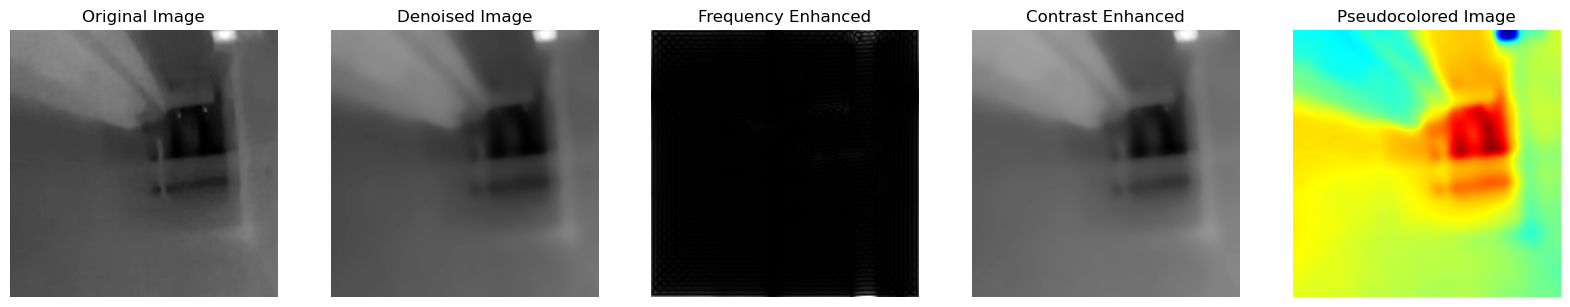

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import restoration
from skimage import img_as_float

# 1. Noise Reduction (Non-Local Means Denoising)
def denoise_image(image):
    denoised_image = restoration.denoise_nl_means(image, h=0.1, patch_size=5, patch_distance=6)
    return denoised_image

# 2. Frequency-Domain Processing (Fourier Transform)
def enhance_frequencies(image):
    # Convert the image to float (0-1 range)
    img_float = img_as_float(image)

    # Perform FFT (Fast Fourier Transform)
    f_transform = np.fft.fft2(img_float)
    f_transform_shifted = np.fft.fftshift(f_transform)  # Shift zero frequency to the center

    # Create a high-pass filter
    rows, cols = img_float.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.float32)
    r = 30  # Mask radius (controls how much low-frequency you want to remove)
    mask[crow-r:crow+r, ccol-r:ccol+r] = 0  # Set low-frequency area to 0

    # Apply mask (high-pass filter)
    f_transform_shifted *= mask

    # Inverse FFT to get back to spatial domain
    f_transform_ishifted = np.fft.ifftshift(f_transform_shifted)
    img_filtered = np.abs(np.fft.ifft2(f_transform_ishifted))

    # Normalize the result to the range 0-255 for visualization
    img_filtered = np.uint8(255 * img_filtered / np.max(img_filtered))

    return img_filtered

# 3. Adaptive Contrast Enhancement (Gamma Correction)
def enhance_contrast(image, gamma=0.8):
    # Apply gamma correction (gamma > 1 darkens the image, gamma < 1 brightens)
    image = np.array(image, dtype=np.float32)
    image = np.power(image / float(np.max(image)), gamma)
    image *= 255
    return np.uint8(image)

# 4. Edge-Preserving Smoothing (Bilateral Filter)
def bilateral_filter(image):
    # Apply bilateral filter
    filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
    return filtered_image

# 5. Pseudocoloring
def apply_pseudocolor(image):
    # Apply a colormap (JET for thermal images)
    pseudocolored_image = cv2.applyColorMap(image, cv2.COLORMAP_JET)
    return pseudocolored_image

# 6. Display Intermediate Visualizations
def display_images(original, denoised, filtered, enhanced, pseudocolored):
    # Display results
    plt.figure(figsize=(20, 10))

    plt.subplot(1, 5, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 5, 2)
    plt.imshow(denoised, cmap='gray')
    plt.title("Denoised Image")
    plt.axis("off")

    plt.subplot(1, 5, 3)
    plt.imshow(filtered, cmap='gray')
    plt.title("Frequency Enhanced")
    plt.axis("off")

    plt.subplot(1, 5, 4)
    plt.imshow(enhanced, cmap='gray')
    plt.title("Contrast Enhanced")
    plt.axis("off")

    plt.subplot(1, 5, 5)
    plt.imshow(pseudocolored)
    plt.title("Pseudocolored Image")
    plt.axis("off")

    plt.show()

# Main function to process the image
def process_image(image_path):
    # Load grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (256, 256))  # Resize image for consistency
    
    # Apply Noise Reduction
    denoised_image = denoise_image(image)

    # Apply Frequency Domain Enhancement
    freq_enhanced_image = enhance_frequencies(denoised_image)

    # Apply Adaptive Contrast Enhancement
    contrast_enhanced_image = enhance_contrast(denoised_image)

    # Apply Edge-Preserving Smoothing
    smoothed_image = bilateral_filter(contrast_enhanced_image)

    # Apply Pseudocoloring for better visualization
    pseudocolored_image = apply_pseudocolor(smoothed_image)

    # Normalize the pseudocolored image for better visualization
    pseudocolored_image = cv2.normalize(pseudocolored_image, None, 0, 255, cv2.NORM_MINMAX)

    # Display all intermediate results
    display_images(image, denoised_image, freq_enhanced_image, contrast_enhanced_image, pseudocolored_image)

# Example Usage (Replace 'image.jpg' with actual path)
process_image("image.png")
